# Question 2

In this part, you are required to perform PCA on images of handwritten digits. In .zip,
we provide mnist digists of 0,1 and 2, which is a subset of the LeCun’s MNIST dataset containing
images of handwritten digits 0, 1, 2. We already provide the code to read images into a
matrix $X$. Each row of the matrix X represents an image. You are required to ﬁnish the following task.

1. Plot the Eigen Images.

Perform PCA on the matrix X. You can use PCA implemented by yourself (in Q1) or the one
provided in scikit-learn (aka sklearn). Plot eigenvectors corresponding to the largest 10 eigenvalues.
Combine and save ﬁgures in a single image ﬁle eigenimages.jpg. We also provide
the sample code for presenting vectors as an image. For PCA on images data, you can
read the example in scikit-learn official user guide.

2. Plot POV.

Plot POV v.s. the order of eigenvalues as in question 1. Save ﬁgure in ﬁle
digit_pov.jpg. You also need to answer the questions mentioned below. For your reference, sample plots and figures are included at the end.

In [4]:
# Do not change this cell
import os.path
import numpy as np
import matplotlib.pyplot as plt
import imageio
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Do not change this cell
def load_data(digits = [0], num = 200):
    '''
    Loads all of the images into a data-array.

    The training data has 5000 images per digit,
    but loading that many images from the disk may take a while.  So, you can
    just use a subset of them, say 200 for training (otherwise it will take a
    long time to complete.

    Note that each image as a 28x28 grayscale image, loaded as an array and
    then reshaped into a single row-vector.

    Use the function display(row-vector) to visualize an image.

    '''
    totalsize = 0
    for digit in digits:
        totalsize += min([len(next(os.walk('train%d' % digit))[2]), num])
    print('We will load %d images' % totalsize)
    X = np.zeros((totalsize, 784), dtype = np.uint8)   #784=28*28
    for index in range(0, len(digits)):
        digit = digits[index]
        print('\nReading images of digit %d' % digit)
        for i in range(num):
            pth = os.path.join('train%d' % digit,'%05d.pgm' % i)
            image = imageio.imread(pth).reshape((1, 784))
            X[i + index * num, :] = image
        print('\n')
    return X

def plot_mean_image(X, digits = [0]):
    ''' example on presenting vector as an image
    '''
    plt.close('all')
    meanrow = X.mean(0)
    # present the row vector as an image
    plt.imshow(np.reshape(meanrow,(28,28)))
    plt.title('Mean image of digit ' + str(digits))
    plt.gray(), plt.xticks(()), plt.yticks(()), plt.show()



# Complete the following code [10 marks]

We will load 1500 images

Reading images of digit 0



Reading images of digit 1



Reading images of digit 2




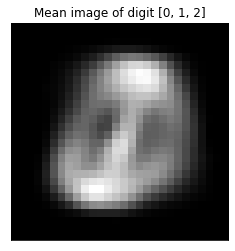

[112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
Number of dimensions needed: 113


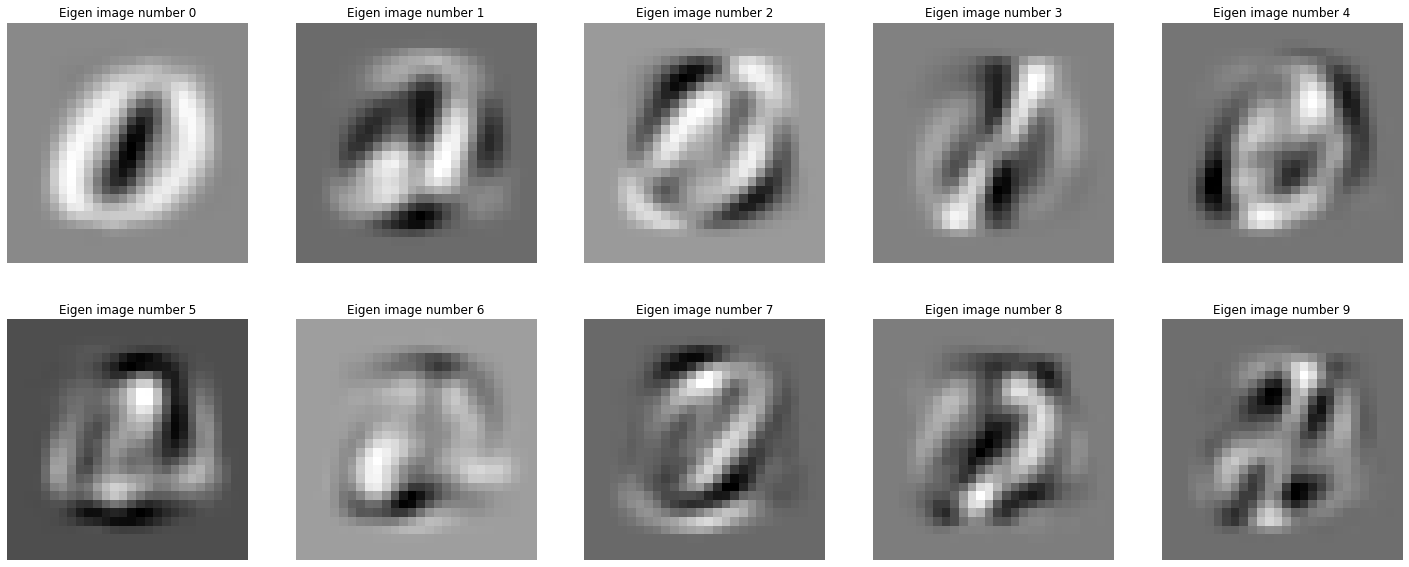

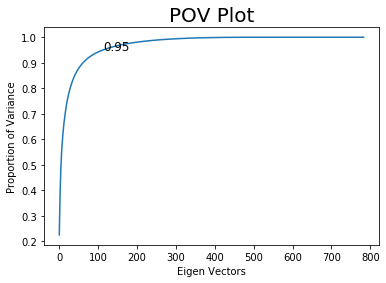

In [27]:
def main():
    digits = [0, 1, 2]
    # load handwritten images of digit 0, 1, 2 into a matrix X
    # for each digit, we just use 500 images
    # each row of matrix X represents an image
    X = load_data(digits, 500)
    # plot the mean image of these images!
    # you will learn how to represent a row vector as an image in this function
    plot_mean_image(X, digits)

    ####################################################################
    # plot the eigen images, eigenvalue v.s. the order of eigenvalue, POV
    # v.s. the order of eigenvalue
    # you need to
    #   1. do the PCA on matrix X;
    #
    #   2. plot the eigenimages (reshape the vector to 28*28 matrix then use
    #   the function ``imshow'' in pyplot), save the images of eigenvectors
    #   which correspond to largest 10 eigenvalues. Save them in a single file
    #   ``eigenimages.jpg''.
    #
    #   3. plot the POV (the Portion of variance explained v.s. the number of
    #   components we retain), save the figure in file ``digit_pov.jpg'' Mark
    #   on the plot where proportion of the variance is 95%.
    #
    #   4. report how many dimensions are need to preserve 0.95 POV (using code), describe
    #   your answers and your undestanding of the results in the plain text
    #   in a cell below. Describe what proportion of the variance means
    #   with respect to the eigen vectors from the POV plot.
    #
    #   5. remember to submit file ``eigenimages.jpg'', ``digit_pov.jpg'',
    #   
    # YOUR CODE HERE!

    ####################################################################
    getPCA = PCA()
    getPCA.fit(X)
    getTransformed = getPCA.transform(X)
    
    #getting eigen vals and eigen vecs
    
    eigenVals = getPCA.explained_variance_
    eigenVecs = getPCA.components_[0:10,:]
    
    #time to get the figures
    figs = plt.figure()
    figs.set_size_inches(25,10)
    
    for i in range(len(eigenVecs)):
      plt.subplot(2,5,i+1)
      plt.title("Eigen image number %s"%str(i))
      plt.imshow(np.reshape(eigenVecs[i],(28,28)))
      plt.axis('off')
        
    figs.savefig("eigenimages.jpg")
    
    
    #Proportion of variance
    pov = getPCA.explained_variance_ratio_.cumsum()
    fig = plt.figure()
    
    
    index = []
    for i,x in enumerate(pov): 
        if x<0.96 and x>0.95:
            index.append(i)
#     print(index)
    print("Number of dimensions needed: %s"%str(index[0]+1))
    
    plt.plot(np.array(range(0,len(getPCA.components_))), pov)
    plt.title("POV Plot", fontsize=20)
    plt.xlabel("Eigen Vectors")
    plt.ylabel("Proportion of Variance")
    xy=(index[0], pov[index[0]])
    plt.annotate("0.95", xy, fontsize=12)
    fig.savefig("digit_pov.jpg")
    ####################################################################
    
if __name__ == '__main__':
    main()


# Answer the following questions from the code above. [15 marks]

**1. How many dimensions are need to preserve 0.95 POV? Use the code above to check this. What's the signifiance of 0.95 POV and how it can be used for dimensionality reduction?**

**Ans:** We need at least 113 dimensions to keep a POV of 95 percent, in other words first 113 eigen-values preserve 0.95 proportion of variance. 

**2. Explain the POV vs Eigenvectors plot.**

**Ans:** This explains how many Principle components are needed, for instance a POV of 20% means the cumulative variance we get from 20 out of 100. Ploting this shows us we can retain  bulk of information using a few eigen-vectors. 

**3. Is it true that highly correlated attributes/pixel values have lower variance? Share your thoughts.**

**Ans:** Yes, this shows the data values are similar